# 🧠 Embeddings and Vector Search
This notebook demonstrates how textual meaning can be represented numerically using *embeddings*.
We'll explore:
- Sentence-level embeddings with **SentenceTransformers**
- Vector similarity search using **FAISS**
- Visualization of text similarity using **PCA** and **t-SNE**

In [4]:
# !pip install sentence-transformers faiss-cpu pandas matplotlib scikit-learn

In [23]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

In [8]:
docs = [
    "The cat sits on the mat.",
    "Dogs are playing in the park.",
    "Quantum physics explores the behavior of particles.",
    "Machine learning is a subset of artificial intelligence.",
    "Neural networks are used for image recognition.",
    "Investors analyze market trends to make decisions.",
    "The stock market fluctuates daily.",
    "A pizza with cheese and olives tastes great.",
    "Rainy weather makes plants grow.",
    "Climate change affects global ecosystems."
]

df = pd.DataFrame(docs, columns=['document'])
df

,document
0,The cat sits on the mat.
1,Dogs are playing in the park.
2,Quantum physics explores the behavior of parti...
3,Machine learning is a subset of artificial int...
4,Neural networks are used for image recognition.
5,Investors analyze market trends to make decisi...
6,The stock market fluctuates daily.
7,A pizza with cheese and olives tastes great.
8,Rainy weather makes plants grow.
9,Climate change affects global ecosystems.


In [25]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['document'], show_progress_bar=True)
embeddings.shape

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(10, 384)

In [12]:
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)  # L2 distance
index.add(np.array(embeddings))
print(f"Total vectors in index: {index.ntotal}")

Total vectors in index: 10


In [14]:
query = "What models are used for AI?"
query_embedding = model.encode([query])

k = 3  # top results
distances, indices = index.search(np.array(query_embedding), k)

print("Query:", query)
print("\nTop matches:\n")
for i, idx in enumerate(indices[0]):
    print(f"{i+1}. {df.iloc[idx]['document']} (Distance: {distances[0][i]:.4f})")

Query: What models are used for AI?

Top matches:

1. Neural networks are used for image recognition. (Distance: 1.0075)
2. Machine learning is a subset of artificial intelligence. (Distance: 1.1302)
3. Investors analyze market trends to make decisions. (Distance: 1.6653)


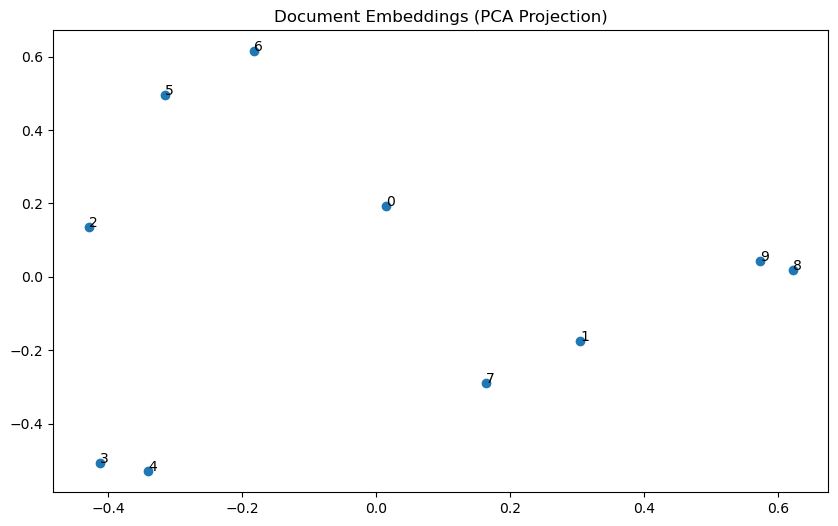

In [16]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(10,6))
plt.scatter(reduced[:,0], reduced[:,1])
for i, text in enumerate(df['document']):
    plt.annotate(f"{i}", (reduced[i,0], reduced[i,1]))
plt.title("Document Embeddings (PCA Projection)")
plt.show()

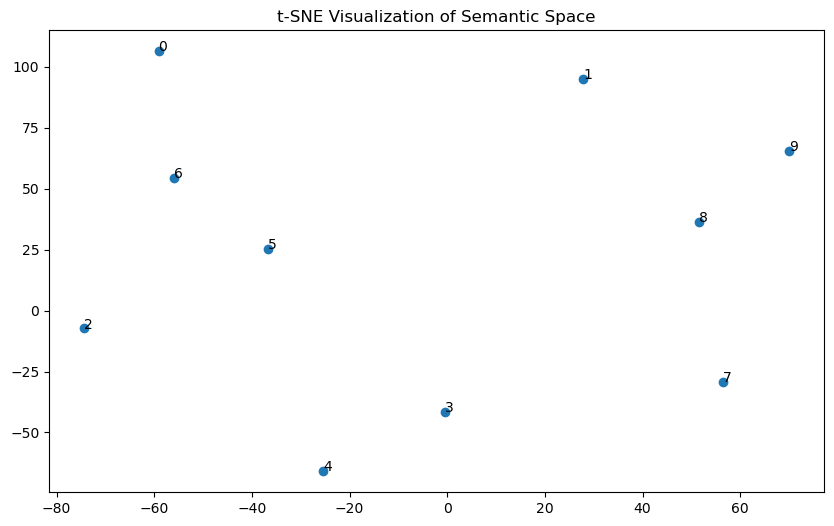

In [21]:
tsne = TSNE(n_components=2, random_state=42, perplexity=len(docs)//2)
tsne_result = tsne.fit_transform(embeddings)


plt.figure(figsize=(10,6))
plt.scatter(tsne_result[:,0], tsne_result[:,1])
for i, text in enumerate(df['document']):
    plt.annotate(f"{i}", (tsne_result[i,0], tsne_result[i,1]))
plt.title("t-SNE Visualization of Semantic Space")
plt.show()

## Key Takeaways
- Sentence embeddings capture **semantic meaning** beyond keywords.
- FAISS enables efficient **vector similarity search**.
- PCA and t-SNE reveal **semantic clusters** visually.
- You can replace SentenceTransformers with **OpenAI ada-002** or **Azure embeddings** for larger projects.